In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies = movies.merge(credits,on='title')

In [4]:
movies = movies[['movie_id','title','overview','genres','cast','keywords','crew']]

In [5]:
movies.isna().sum()

movie_id    0
title       0
overview    3
genres      0
cast        0
keywords    0
crew        0
dtype: int64

In [6]:
movies.dropna(inplace=True) #dropping the 3 movies 

In [7]:
movies.isna().sum()

movie_id    0
title       0
overview    0
genres      0
cast        0
keywords    0
crew        0
dtype: int64

In [8]:
movies.head(3)

,movie_id,title,overview,genres,cast,keywords,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [9]:
# Genre Extraction function : from raw data for the creation of tags
import ast
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [10]:
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)

In [11]:
movies.head(3)

,movie_id,title,overview,genres,cast,keywords,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[culture clash, future, space war, space colon...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[ocean, drug abuse, exotic island, east india ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[spy, based on novel, secret agent, sequel, mi...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [12]:
#function for extracting top(first) 8 actors from the movie 

def convert_actors(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter !=8:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [13]:
movies['cast'] = movies['cast'].apply(convert_actors)

In [14]:
#function to fetch the director of movie from the crew column
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

movies['crew'] = movies['crew'].apply(fetch_director)
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [15]:
movies.head(3)

,movie_id,title,overview,genres,cast,keywords,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[culture clash, future, space war, space colon...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[ocean, drug abuse, exotic island, east india ...",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[spy, based on novel, secret agent, sequel, mi...",[Sam Mendes]


In [16]:
# remove spaces between words 

movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [17]:
movies.head(3)

,movie_id,title,overview,genres,cast,keywords,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[cultureclash, future, spacewar, spacecolony, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[ocean, drugabuse, exoticisland, eastindiatrad...",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[spy, basedonnovel, secretagent, sequel, mi6, ...",[SamMendes]


In [18]:
movies['features'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
 

In [19]:
movies['features'] = movies['features'].apply(lambda x:" ".join(x))

In [20]:
#lower casing all the alphabets in the tags column
movies['features'] = movies['features'].apply(lambda x:x.lower()) 

In [21]:
# Apply Steming to remove similarities/duplications in words list
# import nltk
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

# def xStem(txt):
#     y = []
#     for x in txt.split():
#         y.append(ps.stem(x))
#     return " ".join(y)
# movies['features'] = movies['features'].apply(xStem)   

In [22]:
#apply lemmatization to remove similarities/duplications in words list
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemm(txt):
    y = []
    for x in txt.split():
        y.append(lemmatizer.lemmatize(x))
    return " ".join(y)
movies['features'] = movies['features'].apply(lemm) 

In [23]:
movies['features'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following order and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez giovanniribisi joeldavidmoore cchpounder jamescameron'

In [24]:
#convert text to matrix
from sklearn.feature_extraction.text import TfidfVectorizer 
tf=TfidfVectorizer(stop_words="english")
tf_vector= tf.fit_transform(movies['features']).toarray()

In [25]:
similarity = cosine_similarity(tf_vector)

In [26]:
pd.DataFrame(similarity,index=movies['title'],columns=movies['title'])

title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
title,,,,,,,,,,,,,,,,,,,,,
Avatar,1.000000,0.012705,0.017056,0.012668,0.056715,0.029712,0.001859,0.045125,0.010611,0.013347,...,0.000000,0.000000,0.014058,0.020749,0.000000,0.002283,0.005360,0.011771,0.003234,0.000000
Pirates of the Caribbean: At World's End,0.012705,1.000000,0.007528,0.005108,0.019587,0.041153,0.002029,0.045849,0.011584,0.014570,...,0.000000,0.000000,0.002819,0.003619,0.000000,0.005939,0.000000,0.009943,0.000000,0.003457
Spectre,0.017056,0.007528,1.000000,0.008415,0.014533,0.016957,0.002062,0.044404,0.017001,0.009203,...,0.016944,0.000000,0.000000,0.000000,0.013685,0.006158,0.000000,0.009122,0.000000,0.000000
The Dark Knight Rises,0.012668,0.005108,0.008415,1.000000,0.007623,0.012892,0.005857,0.029864,0.014542,0.146670,...,0.001084,0.002186,0.008093,0.005018,0.010303,0.010332,0.000000,0.009632,0.030299,0.018281
John Carter,0.056715,0.019587,0.014533,0.007623,1.000000,0.030966,0.016206,0.046956,0.003763,0.016588,...,0.004372,0.000000,0.000000,0.003877,0.000000,0.002054,0.000000,0.003684,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
El Mariachi,0.002283,0.005939,0.006158,0.010332,0.002054,0.002047,0.003496,0.010934,0.019230,0.004254,...,0.000000,0.010605,0.009276,0.011309,0.003649,1.000000,0.000000,0.000000,0.006700,0.008502
Newlyweds,0.005360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003672,0.000000,0.000000,0.000000,0.000000,1.000000,0.007435,0.005214,0.000000
"Signed, Sealed, Delivered",0.011771,0.009943,0.009122,0.009632,0.003684,0.010900,0.000000,0.000000,0.016227,0.003815,...,0.005551,0.001993,0.000977,0.011960,0.000000,0.000000,0.007435,1.000000,0.014970,0.016554


In [27]:
distances = similarity[32] ## Similarites for the movie 
sorted(distances,reverse=True)[0:10]

[1.0000000000000007,
 0.2818931899066658,
 0.14112325388627234,
 0.12448385068139997,
 0.10790522942127083,
 0.10664368287598167,
 0.106325786387361,
 0.10386622280700407,
 0.10022230501734344,
 0.09883287505817465]

In [28]:
def recommend(movie):
    movie_index = movies[movies['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:16]
    mov=[]
    id=[]
    scores=[]
    for i in movies_list:
        mov.append(movies.iloc[i[0]].title)
        id.append(movies.iloc[i[0]].movie_id)
        scores.append(i[1])
    dic={'movie_id':id,'title':mov,'Similarity Score':scores}
    return pd.DataFrame(dic) 

How the recommender function works ?

In [29]:
# we first get the index of the movie for example Alice in Wonderland index is 32
movie_index = movies[movies['title'] == 'Alice in Wonderland'].index[0]
movie_index

32

In [30]:
# we get the similarities for the movie
distances = similarity[32] 
# we sort the similarities in descending order
sorted(distances,reverse=True)[0:10]

[1.0000000000000007,
 0.2818931899066658,
 0.14112325388627234,
 0.12448385068139997,
 0.10790522942127083,
 0.10664368287598167,
 0.106325786387361,
 0.10386622280700407,
 0.10022230501734344,
 0.09883287505817465]

In [31]:
#then we get the top 3 movies and their Index and similarity score
num=3
movies_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:num+1]
movies_list

[(105, 0.2818931899066658),
 (80, 0.14112325388627234),
 (3406, 0.12448385068139997)]

In [32]:
# finally we access them using Index
for i in movies_list:
 print(movies.iloc[i[0]].title)
 print(movies.iloc[i[0]].movie_id)

Alice Through the Looking Glass
241259
Snow White and the Huntsman
58595
The Snow Queen
164372


In [33]:
#generate random title from the list of movies
import random
def random_title():
    return random.choice(movies['title'])

random_title()

'Romance & Cigarettes'

In [34]:
movie_name='Pirates of the Caribbean: On Stranger Tides'
popular_movies = recommend(movie_name) 
popular_movies

,movie_id,title,Similarity Score
0,58,Pirates of the Caribbean: Dead Man's Chest,0.261215
1,22,Pirates of the Caribbean: The Curse of the Bla...,0.246250
2,72197,The Pirates! In an Adventure with Scientists!,0.174987
3,285,Pirates of the Caribbean: At World's End,0.170787
4,266647,Pan,0.160062
5,15511,VeggieTales: The Pirates Who Don't Do Anything,0.125307
6,109424,Captain Phillips,0.124572
7,35032,The Pirate,0.121458
8,18808,Highway,0.121420
9,100402,Captain America: The Winter Soldier,0.113271


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


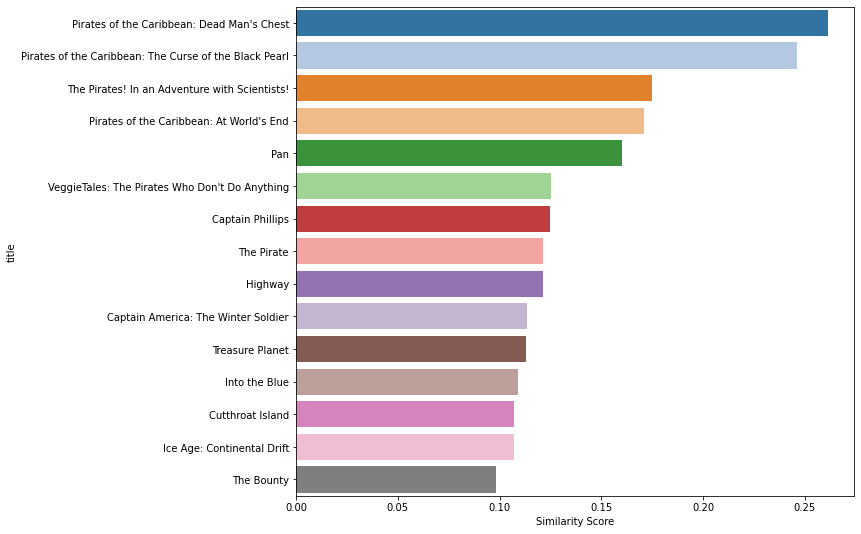

In [35]:

#bar plot titles and similarity scores
import pandas as pd
plt.rcParams['figure.figsize'] = (10, 9)
sns.barplot(popular_movies['Similarity Score'],popular_movies['title'],palette='tab20')
plt.show();

In [36]:
import requests
from IPython.display import Image, HTML, display
def movie_display(popular_movies):
 getList_name = {}
 for x, xRows in popular_movies.iterrows():

    getResponse = requests.get('https://api.themoviedb.org/3/movie/{}?api_key=c0bda0be71f7815fd6ba2eb5f5c86fd8'.format(xRows['movie_id']) ) # every movie has a unique ID 
    getData = getResponse.json() # we request the data from the API and convert it to json
    
    # a bug fixed because sometimes there are is no poster so it returrns error
    if getData['poster_path']==None:
     continue
    else:   
     getPath = "http://image.tmdb.org/t/p/w500" + getData['poster_path']    # get the path of the poster
     getList_name[xRows['title']] = getPath
 
 
 display(HTML(f"""  < <div style="font-size:24px; font-weight:Bold; color:#fff; text-align:center; padding-top:8px; height:12%; width: 100%; border:1px solid #ccc; border-radius:10px; margin-top:10px; background-color:#FA1A1A;">{movie_name}</div> """))   
 # in here he loops on the number of movies to be recommended which is in num_recommend variable in recommend() function
 for i in range(0,popular_movies.shape[0],5):
  

  display( HTML(f"""
                    <table>
                    <tr>
                        <td><img src={list(getList_name.values())[i]} style='border-radius:10px; height:400px; width:575px; border:1px solid #999;'></td>
                        <td><img src={list(getList_name.values())[i+1]} style='border-radius:10px; height:400px; width:575px; border:1px solid #999;'></td>
                        <td><img src={list(getList_name.values())[i+2]} style='border-radius:10px; height:400px; width:575px; border:1px solid #999;'></td>
                        <td><img src={list(getList_name.values())[i+3]} style='border-radius:10px; height:400px; width:575px; border:1px solid #999;'></td>
                        <td><img src={list(getList_name.values())[i+4]} style='border-radius:10px; height:400px; width:575px; border:1px solid #999;'></td>
                        
                    </tr>
                  
                        <td><div style="height:60px; padding-top:15px; text-align:center; font-size:14px; font-weight:bold; border:1px solid #ccc; border-radius:10px;">{list(getList_name.keys())[i+0]}</div></td>
                        <td><div style="height:60px; padding-top:15px; text-align:center; font-size:14px; font-weight:bold; border:1px solid #ccc; border-radius:10px;">{list(getList_name.keys())[i+1]}</div></td>
                        <td><div style="height:60px; padding-top:15px; text-align:center; font-size:14px; font-weight:bold; border:1px solid #ccc; border-radius:10px;">{list(getList_name.keys())[i+2]}</div></td>
                        <td><div style="height:60px; padding-top:15px; text-align:center; font-size:14px; font-weight:bold; border:1px solid #ccc; border-radius:10px;">{list(getList_name.keys())[i+3]}</div></td>
                        <td><div style="height:60px; padding-top:15px; text-align:center; font-size:14px; font-weight:bold; border:1px solid #ccc; border-radius:10px;">{list(getList_name.keys())[i+4]}</div></td>
                    </tr>
                    
                </table>"""))

In [37]:
movie_display(recommend(movie_name,))

,,,,,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: The Curse of the Black Pearl,The Pirates! In an Adventure with Scientists!,Pirates of the Caribbean: At World's End,Pan


,,,,,VeggieTales: The Pirates Who Don't Do Anything,Captain Phillips,The Pirate,Highway,Captain America: The Winter Soldier


,,,,,Treasure Planet,Into the Blue,Cutthroat Island,Ice Age: Continental Drift,The Bounty


In [38]:
# saving the the similaries and the cleaned data
import pickle 
# pickle_out = open("tfidf.pkl", mode = "wb") 
# pickle.dump(similarity, pickle_out)
# pickle_out = open("Movie_data.pkl", mode = "wb") 
# pickle.dump(movies, pickle_out)  
# pickle_out.close()

In [39]:
import bz2file as bz2
with bz2.BZ2File( 'Tfidf'+ '.pbz2', 'wb') as f:
 pickle.dump(similarity, f)

In [41]:
def decompress_pickle(file):

    data = bz2.BZ2File(file, 'rb')
    data = pickle.load(data)
    return data
model = decompress_pickle('Tfidf.pbz2')

In [ ]:
model